In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [79]:
xrange=np.arange(-1,2,0.5)
yrange=np.arange(-1,2,0.5)

X,Y=np.meshgrid(xrange,yrange)

In [80]:
#define functions of the vector at every (x,y) location
def Ucomp(xmatrix,ymatrix):
    return xmatrix 

def Vcomp(xmatrix,ymatrix):
    return ymatrix 

#assing them
U=Ucomp(X,Y)
V=Vcomp(X,Y)

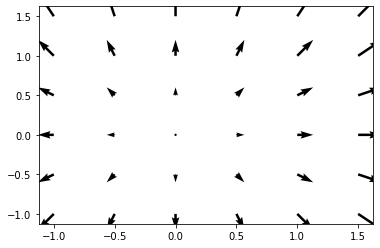

In [81]:
axis=plt.quiver(X,Y,U,V)
plt.show()

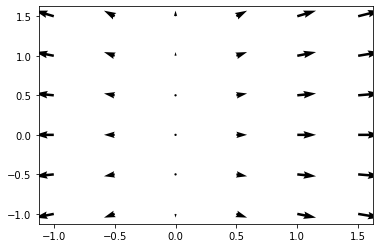

In [82]:
#define functions of the vector at every (x,y) location
def Uflux(xmatrix,ymatrix):
    return np.sin(xmatrix)*2
    
def Vflux(xmatrix,ymatrix):
    return ymatrix/3

#assing them
U=Uflux(X,Y)
V=Vflux(X,Y)

plt.quiver(X,Y,U,V,scale=30)
plt.show()

In [83]:
#Exner function
def ExnerCalculator(X,Y,Uq,Vq,eps=1,dt=0.1):
    """
    ExnerCalculator takes in the X and Y locations and the vector field defined by U and V and returns the
    deposition/erosion happening at the current time.
    
    Parameters
    ----------
    X: matrix 
        x locations of the flux
    Y: matrix 
        y locations of the flux
    Uq: matrix 
        first components of the flux
    Vq: matrix 
        second components of the flux
    eps: float
        1-porosity of the bed
    dt: float
        time delta for the method

    Returns
    -------
    Xs: matrix 
        x locations with n-1 locations corresponding to dh
    Ys: matrix 
        y locations with n-1 locations corresponding to dh
    dh: matrix
        The difference in elevation in dt time units based on the flux
    """
    m,n=X.shape
    dx=X[0][1]-X[0][0]
    dy=Y[1][0]-Y[0][0]

    #gradient
    dUq=[ [Uq[j][i+1]-Uq[j][i] for i in range(n-1) ] for j in range(m-1) ]
    dVq=[ [Vq[j+1][i]-Vq[j][i] for i in range(n-1) ] for j in range(m-1) ]
    
    #exner
    dh=(-dt/eps)*(dUq/dx+dVq/dy)

    #new Xs and Ys
    Xs=np.array([ [X[j][i] for i in range(n-1) ] for j in range(m-1) ])
    Ys=np.array([ [Y[j][i] for i in range(n-1) ] for j in range(m-1) ])

    return Xs,Ys,dh

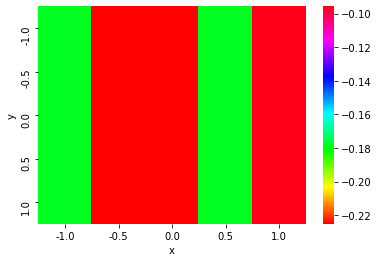

In [84]:
# the flux
newx,newy,deltah=ExnerCalculator(X,Y,U,V)

#plot the heatmap
erosion=pd.DataFrame( {"x": newx.flatten() ,"y":newy.flatten(),"erosion": deltah.flatten()} )
erosion_table=erosion.pivot_table(columns="x",index="y",values="erosion")
sns.heatmap(erosion_table,cmap="hsv")

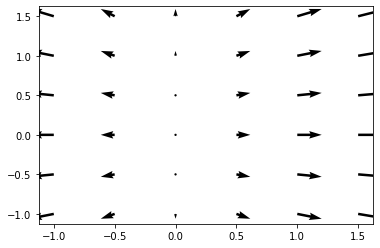

In [85]:
plt.figure()
plt.quiver(X,Y,U,V)
plt.show()

SEGUNDA PARTE

In [43]:
weight=[162.22, 156.12, 169.31, 179.76, 173.12, 165.66, 166.61, 170.91, 156.67, 170.94]
height=[7.8954, 7.7507, 7.7312, 7.9815, 7.8738, 7.6802, 7.7422, 7.8297, 7.8992, 7.9033]
age=[32, 33, 22, 45, 33, 49, 36, 20, 41, 25]

In [44]:
# Create a dataset
df = pd.DataFrame(np.random.random((10,3)), columns=["weight","height","age",])

In [47]:
# Calculate correlation between each pair of variable
corr_matrix=df.corr()

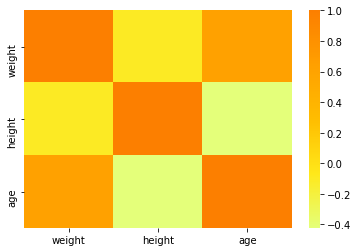

In [53]:
sns.heatmap(corr_matrix, cmap='Wistia')

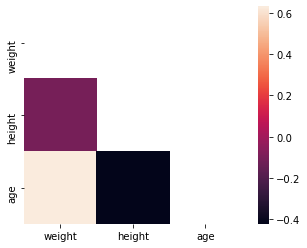

In [86]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask
sns.heatmap(corr_matrix, mask=mask, square=True)
